### Natural Language Processing

**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way.

**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include Positive, Neutral, and Negative, Review Ratings and Happy, Sad. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject.

**Sentiment Analysis**

Sentiment Classification is a perfect problem in NLP for getting started in it. You can really learn a lot of concepts and techniques to master through doing project. Kaggle is a great place to learn and contribute your own ideas and creations. I learnt lot of things from other, now it's my turn to make document my project.

I will go through all the key and fundament concepts of NLP and Sequence Models, which you will learn in this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###### **Importing Dependencies**
We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
print("Tensorflow Version", tf.__version__)

Tensorflow Version 2.13.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Dataset Preprocessing¶

In this notebook, I am using Sentiment-140 from Kaggle. It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/TEXT_CLASSIFICATION/text_classification_data.csv", encoding="ISO-8859-1")
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
#columns are without name
#let's name them for our reference

df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


We are going to train only on text to classify its sentiment. So we can ditch the rest of the useless columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   id         1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   query      1599999 non-null  object
 4   user_id    1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis = 1)
df.head()

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


Here are decoding the labels.

 We map **0** **->** **Negative** **and** **1** **->** **Positive**
as directed by the datset desciption. Now that we decoded we shall now analyse the dataset by its distribution. Because it's important that we have almost small amount of examples for given classes.

In [ ]:
lab_to_sentiment = {0:'Negative', 4:'Positive'}
def label_decoder(label):
  return lab_to_sentiment[label]

df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,is upset that he can't update his Facebook by ...
1,Negative,@Kenichan I dived many times for the ball. Man...
2,Negative,my whole body feels itchy and like its on fire
3,Negative,"@nationwideclass no, it's not behaving at all...."
4,Negative,@Kwesidei not the whole crew


Text(0.5, 1.0, 'Sentiment Data Distribution')

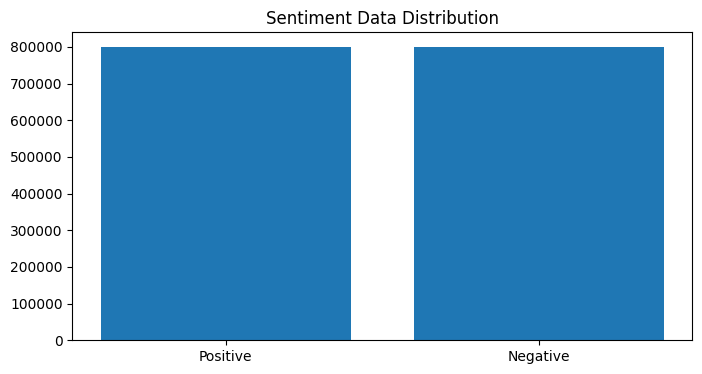

In [ ]:
#plot the graph for based on sentiment using matplotlib

val_count = df.sentiment.value_counts()

plt.figure(figsize = (8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
#plotting using plotly
import plotly.express as px

# Assuming 'df' is your DataFrame containing sentiment data
val_count = df['sentiment'].value_counts().reset_index()
val_count.columns = ['sentiment', 'count']

# Create the bar plot using Plotly
fig = px.bar(val_count, x='sentiment', y='count', title='Sentiment Data Distribution')
fig.show()


In [ ]:
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(10)] #creates random indexes to choose from dataframe
df.loc[random_idx_list, :].head(10)

,sentiment,text
1274077,Positive,Morning everyone
139886,Negative,"@Catmoo Oops, just realised it clashed with Gl..."
1016074,Positive,@taylathegreat5 oh ok. greattt. '')
627176,Negative,Rob D. - RE/; Castelvania SOTN - They just don...
1180005,Positive,"@pinksugacupcake girl, that's when guys always..."
678274,Negative,"oh and the new show &quot;wedding day&quot;, m..."
126322,Negative,Watching Madagascar... I miss Loydd
265533,Negative,@jawabait NOOOO DON'T GIVE UP. you neeeed to s...
1136493,Positive,about to go out tonight for a little. May is a...
1150075,Positive,@chavtasticjinx ROFLMAO that's AWESOME. I love...


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.



### Text Preprocessing

Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. Let's continue

**Stemming:**
Stemming is like chopping off the ends of words to find their root form.
It removes common suffixes from words to reduce them to their basic form.

For example, "jumping," "jumps," and "jumped" would all be reduced to the stem "jump."

**Lemmatization:**
Lemmatization is a more precise technique.

It reduces words to their base or dictionary form, called the "lemma."

For example, "jumping," "jumps," and "jumped" would all be lemmatized to "jump."

In simple terms, stemming is a bit more aggressive and might not always give you a real word, while lemmatization tries to give you actual words from a dictionary. Both techniques are used to make text analysis easier by reducing words to their core forms.

**Hyperlinks and Mentions**

Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

Twitter User Mentions - Eg. @arunrk7, @andrewng

Hyperlinks - Eg. https://keras.io, https://tensorflow.org

**Stopwords**

Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification.

**NLTK** is a python library which got functions to perform text processing task for NLP.

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:

def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)


In [ ]:
df.text = df.text.apply(lambda x : preprocess(x))

In [ ]:
df['text']

0          upset update facebook texting might cry result...
1          dived many times ball managed save 50 rest go ...
2                           whole body feels itchy like fire
3                                           behaving mad see
4                                                 whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995             thewdb com cool hear old walt interviews
1599996                      ready mojo makeover ask details
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

Wow... we can see that It is clean and tidy now. Now let's see some word cloud visualizations of it.

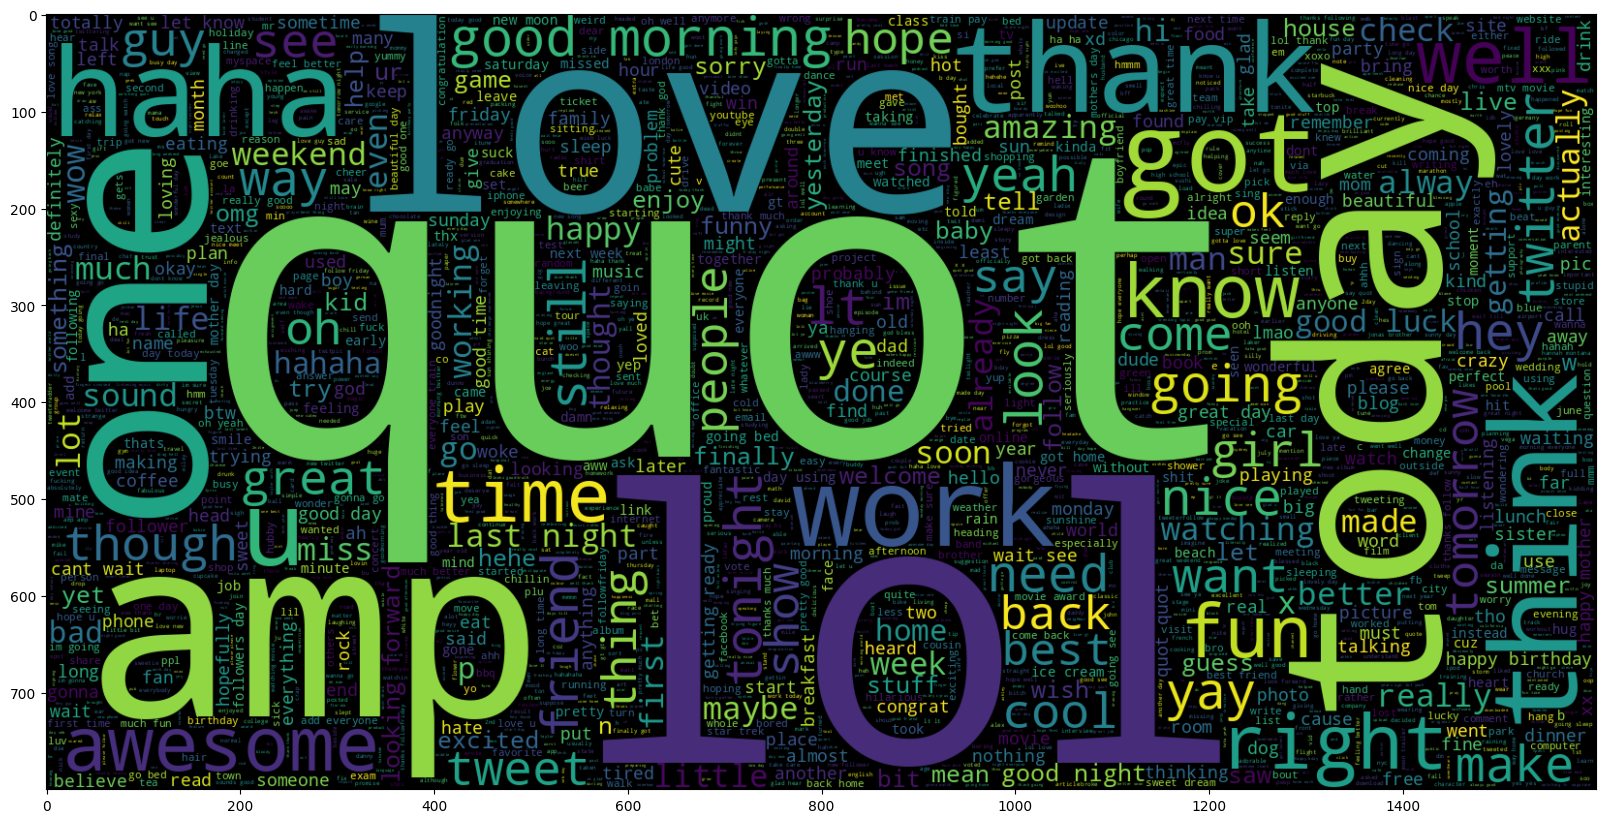

In [ ]:
#for positive words
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc, interpolation = 'bilinear')


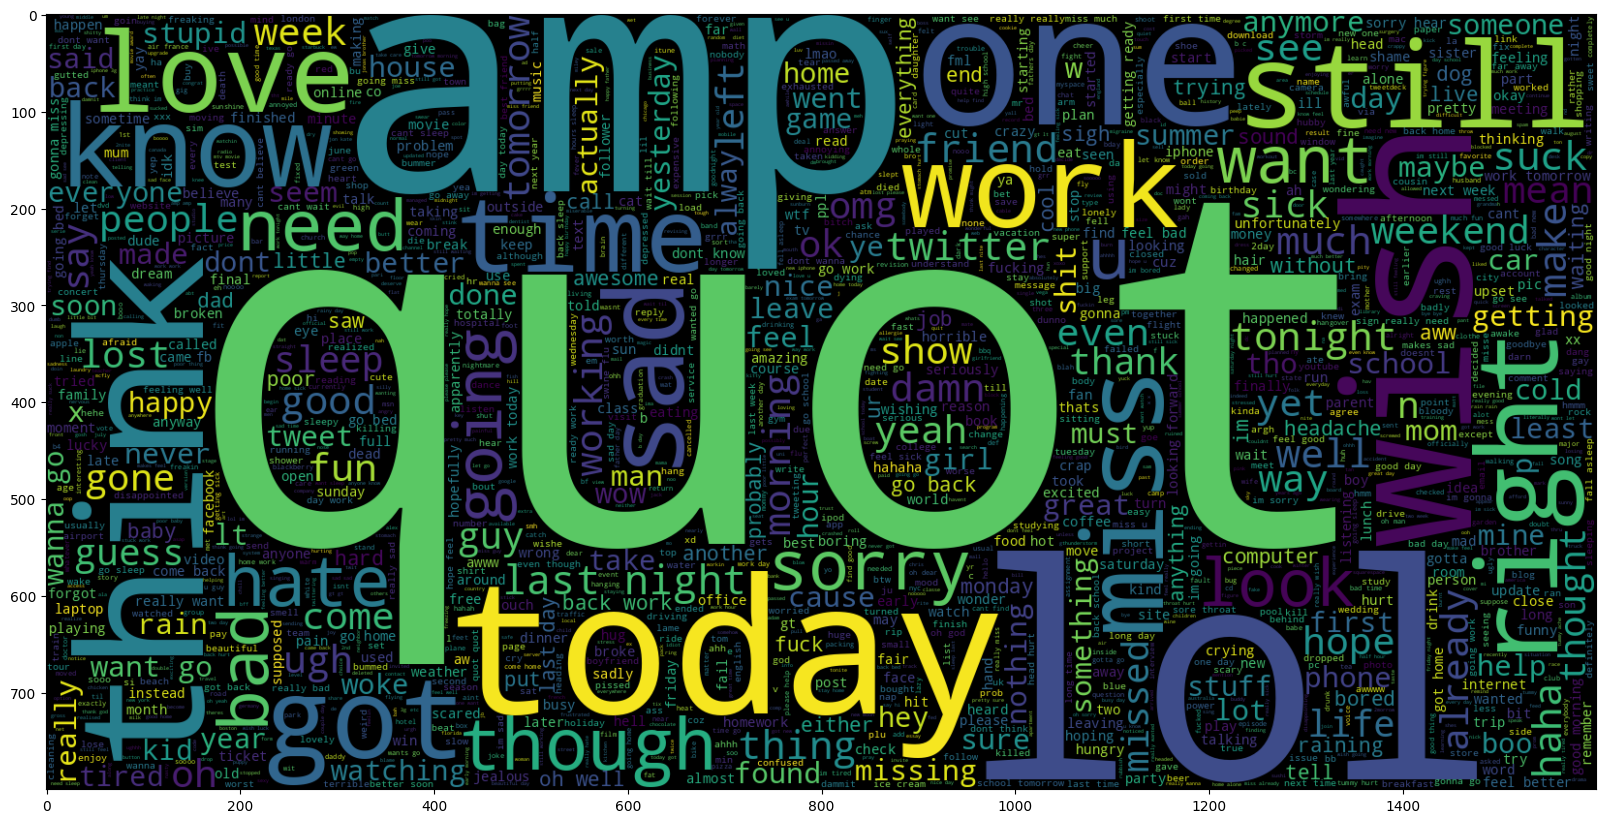

In [ ]:
#for negative words
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc, interpolation = 'bilinear')

Train and Test Split

In [ ]:
TRAIN_SIZE = 0.8
MAX_NS_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

train_test_split will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [ ]:
train_data, test_data = train_test_split(df, test_size = 1-TRAIN_SIZE, random_state = 7)

In [ ]:
print("Train Data size:", len(train_data))
print("Test Data size:", len(test_data))

Train Data size: 1279999
Test Data size: 320000



#### Tokenization
 in simple words, is the process of breaking down a piece of text into smaller units, usually words or phrases. These smaller units are called "tokens." Think of it like splitting a sentence into individual words or breaking down a paragraph into sentences. Tokenization is a fundamental step in natural language processing that makes it easier for computers to understand and analyze text because it breaks the text into manageable pieces for further analysis or processing.

**tokenizer** create tokens for every word in the data corpus and map them to a index using dictionary.

**word_index** contains the index for each word

**vocab_size** represents the total number of word in the data corpus

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size:",  vocab_size)

Vocabulary Size: 290658


Now we got a tokenizer object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a **sequence model**. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from **pad_sequence** to do our job. It will make all the sequence in one constant length MAX_SEQUENCE_LENGTH.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text), maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:", x_train.shape)
print("Testing X Shape:", x_test.shape)



Training X Shape: (1279999, 30)
Testing X Shape: (320000, 30)


In [ ]:
labels = train_data.sentiment.unique().tolist()

#### Label Encoding

We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)


Y_train shape: (1279999, 1)
Y_test shape: (320000, 1)


#### Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it.

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.


Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use Transfer Learning. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like GloVe & Word2Vec gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding

In this notebook, I used GloVe Embedding from Stanford AI which can be found here

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-10-05 05:31:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-10-05 05:31:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-10-05 05:31:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# GLOVE_EMB = '/content/text_classification/glove.6B.300d.txt
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/content/drive/MyDrive/TEXT_CLASSIFICATION/best_model.hdf5'

In [ ]:
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs

f.close()


In [ ]:
print("Found %s word vectors." %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,
                                            weights = [embedding_matrix],
                                            input_length = MAX_SEQUENCE_LENGTH,
                                            trainable = False)

### Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors.

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional,LSTM, Dense,Input, Dropout
from tensorflow.keras.layers import  SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
sequence_input = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype = 'int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation = 'relu')(x)
x = Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(1,activation = 'sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

#### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent.

**Callbacks**
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

       **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

      **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer = Adam(learning_rate = LR),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor = 0.1,
                                      min_lr = 0.01,
                                      monitor = 'val_loss',
                                      verbose = 1)

Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [ ]:
history = model.fit(x_train, y_train ,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = (x_test, y_test),
                    callbacks = [ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 392s 292ms/step - loss: 0.5190 - accuracy: 0.7392 - val_loss: 0.4814 - val_accuracy: 0.7664 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 350s 280ms/step - loss: 0.4873 - accuracy: 0.7625 - val_loss: 0.4732 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 354s 283ms/step - loss: 0.4769 - accuracy: 0.7694 - val_loss: 0.4697 - val_accuracy: 0.7743 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 360s 287ms/step - loss: 0.4701 - accuracy: 0.7736 - val_loss: 0.4632 - val_accuracy: 0.7773 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 351s 281ms/step - loss: 0.4666 - accuracy: 0.7759 - val_loss: 0.4604 - val_accuracy: 0.7792 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 354s 283ms/step - loss: 0.4625 - accuracy: 0.7783 - val_loss: 0.4603 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 7/10
1250/1250 [============

#### Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

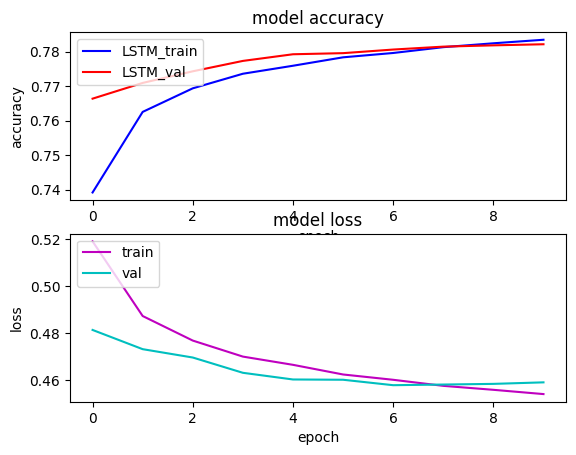

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as POSITIVE sentiment.

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 4s 66ms/step


**Confusion Matrix**

Confusion Matrix provide a nice overlook at the model's performance in classification task

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

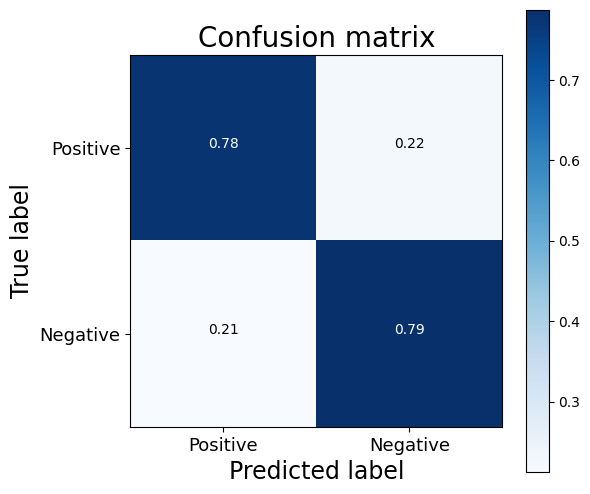

In [ ]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

**Classification Scores**


In [ ]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78    160336
    Positive       0.78      0.79      0.78    159664

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks. Also, you may go on and explore the dataset, some tweets might have other languages than English. So our Embedding and Tokenizing wont have effect on them. But on practical scenario, this model is good for handling most tasks for Sentiment Analysis.